In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
actions = np.random.uniform(0, 2, size=(10))
print(actions)
action_dim = 2
actions[:-action_dim] =  actions[action_dim:]
print(actions)

[1.29290767 0.84065122 1.52202317 1.59193254 0.51817298 1.41748976
 1.25327308 1.46678575 1.20196237 1.84331857]
[1.52202317 1.59193254 0.51817298 1.41748976 1.25327308 1.46678575
 1.20196237 1.84331857 1.20196237 1.84331857]


## Set env state tests



### Inverted pendulum


In [2]:
import gymnasium as gym
import numpy as np

env = gym.make("InvertedPendulum-v5")
init_state, info = env.reset()
print("init_state ", init_state, "\n")
state, action, terminated, truncated, info = env.step(env.action_space.sample())
# x = state[0], state[1]
print("state ", state, "\n")
# # Temporarily set the environment's state to `x`
env.unwrapped.set_state(state[:2], state[2:])  # For InvertedPendulum: (qpos, qvel)
# # Check if the state has been set correctly
# Verify state was set correctly
current_qpos = env.unwrapped.data.qpos.copy()
current_qvel = env.unwrapped.data.qvel.copy()
assert np.allclose(current_qpos, state[:2]), "qpos mismatch!"
assert np.allclose(current_qvel, state[2:]), "qvel mismatch!"

print(hasattr(env.unwrapped, "set_state"))  # Should print True
print(current_qpos, current_qvel)
print(state)


init_state  [0.00420111 0.0055745  0.00867916 0.00591128] 

state  [-0.01020939  0.04001899 -0.72710432  1.69885069] 

True
[-0.01020939  0.04001899] [-0.72710432  1.69885069]
[-0.01020939  0.04001899 -0.72710432  1.69885069]


In [3]:
import copy
env_copy = copy.deepcopy(env)
env_copy

<TimeLimit<OrderEnforcing<PassiveEnvChecker<InvertedPendulumEnv instance>>>>

### Lunar lander


In [4]:
env = gym.make("LunarLander-v3", continuous=True)
env = env.unwrapped
env.reset(seed=0)
print(env.reset(seed=0))
print(env.lander.position, env.lander.linearVelocity, env.lander.angle, env.lander.angularVelocity)



(array([ 0.00570612,  1.3990337 ,  0.5779653 , -0.5282997 , -0.0066053 ,
       -0.13091765,  0.        ,  0.        ], dtype=float32), {})
b2Vec2(10.0571,13.2602) b2Vec2(2.88983,-3.96225) -0.006605303846299648 -0.32729414105415344


### MuJoCo reacher


In [5]:
import gymnasium as gym
import numpy as np

env = gym.make("Reacher-v5")
state, info = env.reset(seed=0)
print("Initial state:", state, "\n")
qpos_og = env.unwrapped.data.qpos.copy()
qvel_og = env.unwrapped.data.qvel.copy()
target_pos_og = env.unwrapped.model.site_pos[0].copy()
print("Initial qpos:", qpos_og, "\n")
print("Initial qvel:", qvel_og, "\n")
print("target_pos ", target_pos_og, "\n")

# Step once
next_state, _, _, _, _ = env.step(env.action_space.sample())

# Reacher has:
# qpos = [theta1, theta2, fingertip_x, fingertip_y]
# qvel = [theta1_dot, theta2_dot]

# We only care about the joint angles and velocities for setting state
qpos = env.unwrapped.data.qpos.copy()
qvel = env.unwrapped.data.qvel.copy()
env.unwrapped.model.site_pos[0] = target_pos_og  # Manually set target position

print("New qpos:", qpos)
print("New qvel:", qvel)

# Now set state back
env.unwrapped.set_state(qpos_og, qvel_og)

# Verify
assert np.allclose(env.unwrapped.data.qpos, qpos_og)
assert np.allclose(env.unwrapped.data.qvel, qvel_og)
assert np.allclose(env.unwrapped.model.site_pos[0], target_pos_og)

print("env.unwrapped.data.qpos ", env.unwrapped.data.qpos)
print("env.unwrapped.data.qvel ", env.unwrapped.data.qvel)
print("env.unwrapped.model.site_pos[0] ", env.unwrapped.model.site_pos[0])

print("Reacher state reset successfully.")


Initial state: [ 9.99624853e-01  9.98940224e-01  2.73889120e-02 -4.60263911e-02
  4.26543103e-02  9.17986244e-02  4.36249915e-04  4.35072424e-03
  1.67289045e-01 -9.11111494e-02] 



IndexError: index 0 is out of bounds for axis 0 with size 0

### Panda reach


In [ ]:
# import gymnasium as gym
# import numpy as np

# import panda_gym

# env = gym.make("PandaReachDense-v3", render_mode="human")
# env = env.unwrapped
# observation, _ = env.reset()

# for _ in range(1000):
#     state_id = env.save_state()

#     # Sample 5 actions and choose the one that yields the best reward.
#     best_reward = -np.inf
#     best_action = None
#     for _ in range(5):
#         env.restore_state(state_id)
#         action = env.action_space.sample()
#         observation, reward, _, _, _ = env.step(action)
#         if reward > best_reward:
#             best_reward = reward
#             best_action = action

#     env.restore_state(state_id)
#     env.remove_state(state_id)  # discard the state, as it is no longer needed

#     # Step with the best action
#     observation, reward, terminated, truncated, info = env.step(best_action)

#     if terminated:
#         observation, info = env.reset()

# env.close()

In [5]:
import gymnasium as gym
import panda_gym

env = gym.make("PandaReach-v3")
env = env.unwrapped
state, info = env.reset(seed=0)
print("Initial state:", state, "\n")

state_id = env.save_state()

next_state, reward, terminated, truncated, info = env.step(env.action_space.sample())
print("Next state:", next_state, "\n")

env.restore_state(state_id)
env.remove_state(state_id)
# print(env.__getstate__())
print(env._get_obs())



Initial state: {'observation': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00], dtype=float32), 'achieved_goal': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01], dtype=float32), 'desired_goal': array([ 0.04108851, -0.06906398,  0.01229206], dtype=float32)} 

Next state: {'observation': array([ 0.02517934, -0.01980565,  0.16913602, -0.4719718 , -0.43623236,
       -0.82817054], dtype=float32), 'achieved_goal': array([ 0.02517934, -0.01980565,  0.16913602], dtype=float32), 'desired_goal': array([ 0.04108851, -0.06906398,  0.01229206], dtype=float32)} 

{'observation': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00], dtype=float32), 'achieved_goal': array([ 3.8439669e-02, -2.1944723e-12,  1.9740014e-01], dtype=float32), 'desired_goal': array([ 0.04108851, -0.06906398,  0.01229206], dtype=float32)}


## Graphs


In [3]:
# PE_ilqr = np.load("C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\Pendulum_iLQR_results.npz")
PE_ilqr = np.load("C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\Pendulum_iLQR_results.npz")




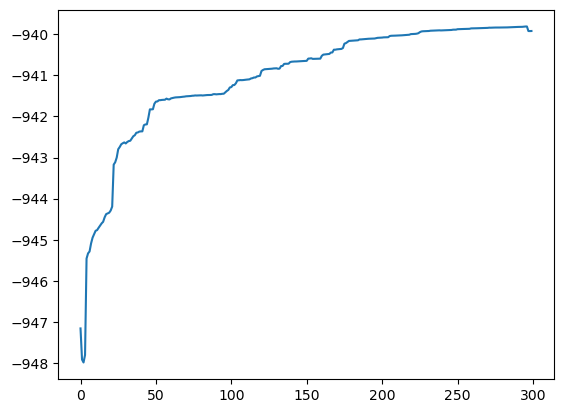

In [4]:
plt.plot(PE_ilqr['mean_rewards'])

